<a href="https://colab.research.google.com/github/SergeyS1954/CLT/blob/main/LW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа № 1
## Характеристики основных функций распределения, используемых в теории надежности

## Функция распределения экспоненциально распределенной случайной величины

Экспоненциальное распределение является наиболее широко распространенной моделью для определения времени жизни элемента.

Напомним, что функция распределения случайной величины с  экспоненциальным распределением с параметром $\lambda$ ($\lambda > 0$) задается как
$$
F(t) =
\begin{cases}  
 1 - e^{-\lambda t} = 1 - \exp(-\lambda t), &  t > 0,\\
	0, & t \leq 0.
\end{cases}
$$
Плотность экспоненциального распределения:
$$
f(t) =
\begin{cases}  
	\lambda e^{-\lambda t} = \lambda \exp(-\lambda t), &  t \geq 0,\\
	0, & t < 0.
\end{cases}
$$

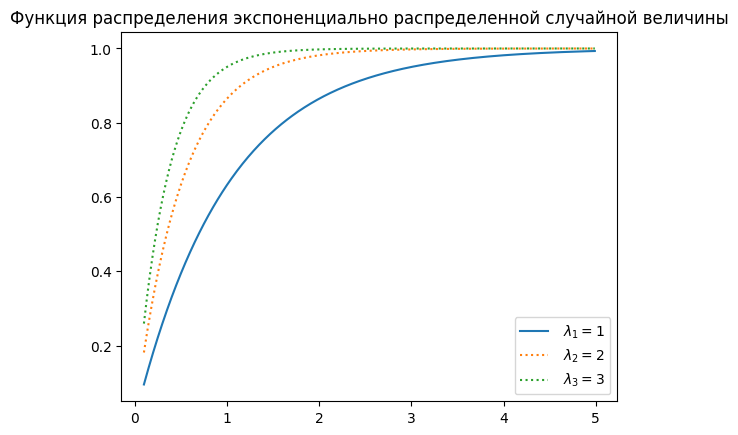

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
lam = 1.0
x = np.arange (0.1, 5.0, 0.01)
y1 = stats.expon.cdf(x,0, 1/lam)
y2 = stats.expon.cdf(x, 0, 1/(2*lam))
y3 = stats.expon.cdf(x, 0, 1/(3*lam))
plt.plot(x,y1, label = r" $\lambda_1 = 1$")
plt.plot(x,y2, linestyle = ':', label = r" $\lambda_2 = 2$")
plt.plot(x,y3, linestyle = ':', label = r" $\lambda_3 = 3$")
plt.legend()
plt.title('Функция распределения экспоненциально распределенной случайной величины')
plt.show()

## Характеристики экспоненциально распределенной случайной величины

Графики плотности распределения случайной величины с экспоненциальным распределением и значениями  параметра $\lambda = 1,2,3$.

Математическое ожидание, медиана и дисперсия случайной величины:
$$
\mathbb{M}(\xi) = \frac{1}{\lambda} ,\ \  Med(\xi)= \frac{\ln(2)}{\lambda},\ \ \mathbb{D}(\xi) = \frac{1}{(\lambda)^2}.
$$

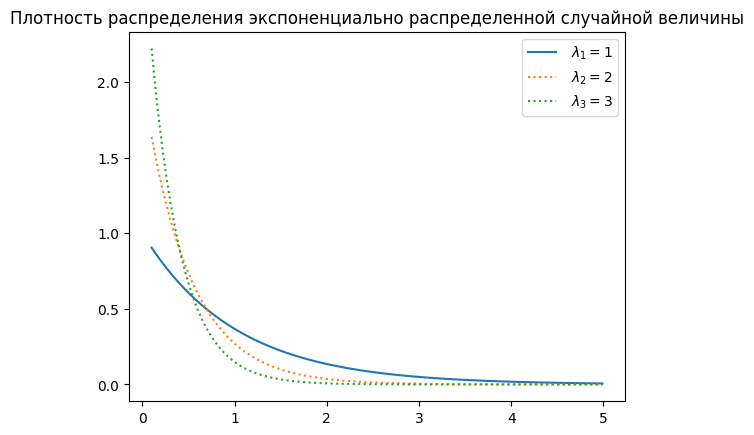

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
lam = 1.0
y1 = stats.expon.pdf(x,0, 1/lam)
y2 = stats.expon.pdf(x, 0, 1/(2*lam))
y3 = stats.expon.pdf(x, 0, 1/(3*lam))
plt.plot(x,y1, label = r" $\lambda_1 = 1$")
plt.plot(x,y2, linestyle = ':', label = r" $\lambda_2 = 2$")
plt.plot(x,y3, linestyle = ':', label = r" $\lambda_3 = 3$")
plt.legend()
plt.title('Плотность распределения экспоненциально распределенной случайной величины')
plt.show()

## Оценка параметра $\lambda$ экспоненциально распределенной случайной величины

Вычисление характеристик выборки из генеральной совокупности значений случайной величины с экспоненциальным распределением может быть выполнено с использованием стандартных модулей библиотеки NumPy (существуют и другие библиотеки с аналогичными функциями).

Рассмотрим пример. В роли исходных данных будет выступать выборка объемом $10^2$ значений случайной величины с экспоненциальным распределением ($\lambda = 2$), сгенерированная средствами  библиотеки NumPy.

Выполните расчет значений среднего, медианы, дисперсии экспоненциально распределенной случайной величины по выборке.


In [12]:
np.random.seed(12345)
test = np.random.exponential(0.5, 100)
print('Среднее: ',"%7.5f"%np.mean(test))
print('Медиана: ',"%7.5f"%np.median(test))
print('Дисперсия: ',"%7.5f"%np.var(test))


Среднее:  0.56470
Медиана:  0.43936
Дисперсия:  0.23082


Увеличим объем выборки до $10^4$  значений случайной величины с экспоненциальным распределением с тем же значением параметра ( $\lambda$=2 ), сгенерированная средствами библиотеки NumPy.

Расчет значений среднего, медианы, стандартного отклонения экспоненциально распределенной случайной величины по выборке с увеличенным числом наблюдений.

In [11]:
test = np.random.exponential(0.5, 10000)
print('Среднее: ',"%7.5f"%np.mean(test))
print('Медиана: ',"%7.5f"%np.median(test))
print('Дисперсия: ',"%7.5f"%np.var(test))


Среднее:  0.50567
Медиана:  0.34826
Дисперсия:  0.26253


Сделайте вывод о влиянии объема выборки на точность получаемой оценки. Если представленных данных недостаточно, измените код программы для увеличения объема второй выборки. Охарактеризуйте зависимость результата от выбора начального заполнения генератора случайных чисел (параметр seed).

# Распределение Эрланга
Распределение Эрланга является двупараметрическим распределением. Для распределения Эрланга  параметр $\lambda > 0$, а параметр $k$ --- целое число.  Если параметр $k$ принимает конкретное значение, говорят о распределении Эрланга  $k$-го порядка.

Распределение Эрланга --- это распределение суммы $k$ независимых экспоненциально распределенных случайных величин с математическим ожиданием  $\frac{1}{\lambda}$.

Эквивалентно, это распределение времени до $k$-го события пуассоновского процесса с параметром $\lambda $.

Для теории надежности характерна следующая модель, приводящая к распределению Эрланга. Пусть отказ системы наступает в результате прохождения $k$ этапов, причем длительности этих этапов определяются независимыми экспоненциально распределенными случайными величинами с параметром $\lambda$. Предполагается, что этапы сменяют друг друга мгновенно.

Отказ наступает при завершении $k$-го этапа. Таким образом, время безотказной работы системы равно сумме длительностей этапов. Функция распределения суммы одинаково распределенных случайных величин задается сверткой функций распределения соответствующей кратности.


Плотность распределения Эрланга $k$-го порядка задается следующим образом:
$$ f(t) = \frac{\lambda (\lambda t)^{k-1}}{(k - 1)!} e^{-\lambda t}.$$

Математическое ожидание и дисперсия случайной величины, имеющей распределение Эрланга $k$-го порядка  определяются формулами:
$$
\mathbb{M}_k = \frac{k}{\lambda} , \ \ \mathbb{D}_k = \frac{k}{(\lambda)^2}.
$$


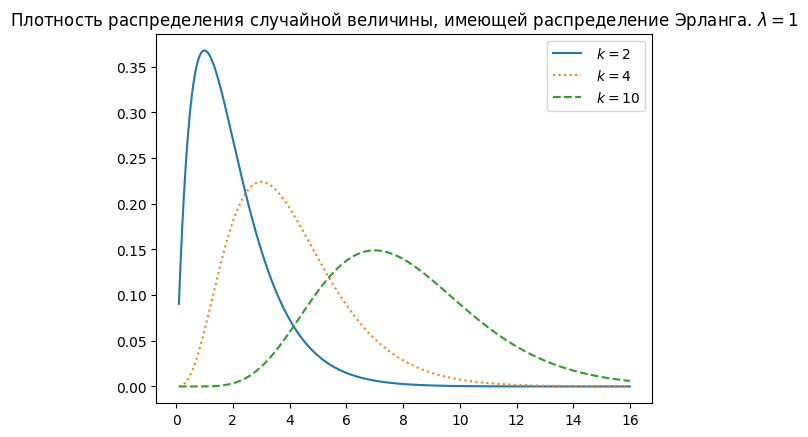

In [5]:
lam = 1.0
x = np.arange (0.1, 16.0, 0.01)
y2 = stats.erlang.pdf(x, 2.0)
y3 = stats.erlang.pdf(x, 4.0)
y4 = stats.erlang.pdf(x, 8.0)
plt.plot(x,y2, label = r" $k = 2$")
plt.plot(x,y3, linestyle = ':', label = r" $k = 4$")
plt.plot(x,y4, linestyle = '--', label = r" $k = 10$")
plt.legend()
plt.title('Плотность распределения случайной величины, имеющей распределение Эрланга. $\lambda = 1$')
plt.show()

## Оценка параметра  K  случайной величины, имеющей распределение Эрланга

Вычисление статистических характеристик выборки из генеральной совокупности значений случайной величины с  распределением Эрланга может быть выполнено с использованием стандартных модулей библиотеки NumPy (существуют и другие библиотеки с аналогичными функциями).

Рассмотрим пример. Предположим, что исследователь, исходя из некоторых соображений, считает, что параметр $\lambda = 2$.  Сгенерируйте выборку  объемом  $10^2$  значений случайной величины с распределением Эрланга ( параметр $k$ = 4).

Выполните расчет значений среднего, медианы, дисперсии экспоненциально распределенной случайной величины по выборке.

In [17]:
test = np.random.gamma(4, 0.5, 100)
print('Среднее: ',"%7.5f"%np.mean(test))
print('Медиана: ',"%7.5f"%np.median(test))
print('Дисперсия: ',"%7.5f"%np.var(test))

Среднее:  1.96539
Медиана:  1.91530
Дисперсия:  0.83080


Увеличим объем выборки до  $10^4$  значений случайной величины с экспоненциальным распределением с тем же значением параметров $(k = 4,   \lambda = 2 )$, сгенерированная средствами библиотеки NumPy.

Расчет значений среднего, медианы, стандартного отклонения экспоненциально распределенной случайной величины по выборке с увеличенным числом наблюдений.

In [21]:
test = np.random.gamma(4, 0.5, 10000)
print('Среднее: ',"%7.5f"%np.mean(test))
print('Медиана: ',"%7.5f"%np.median(test))
print('Дисперсия: ',"%7.5f"%np.var(test))

Среднее:  1.98963
Медиана:  1.81826
Дисперсия:  1.01472


# Гамма-распределение
Распределение Эрланга может быть обобщено на случай, когда параметр $k$ принимает не целые, а действительные значения. В этом случае говорят о гамма-распределении, причем традиционно второй параметр принято обозначать $\alpha$.

Плотность гамма-распределения с параметрами $\lambda$ и $\alpha$ задается как:
$$
f(t) =
	\frac{\lambda (\lambda t)^{\alpha-1}}{\Gamma(\alpha)} e^{-\lambda t}.
$$

Напомним, что гамма-функция задается формулой
$$
\Gamma(\alpha) = \int_{0}^{\infty}e^{-y}y^{\alpha - 1} dy.
$$
Математическое ожидание и дисперсия случайной величины, имеющей гамма-распределение с параметрами $\lambda$ и $\alpha$ определяются формулами:
$$
\mathbb{M}(\xi) = \frac{\alpha}{\lambda} , \ \ \mathbb{D}(\xi) = \frac{\alpha}{\lambda^2}.$$

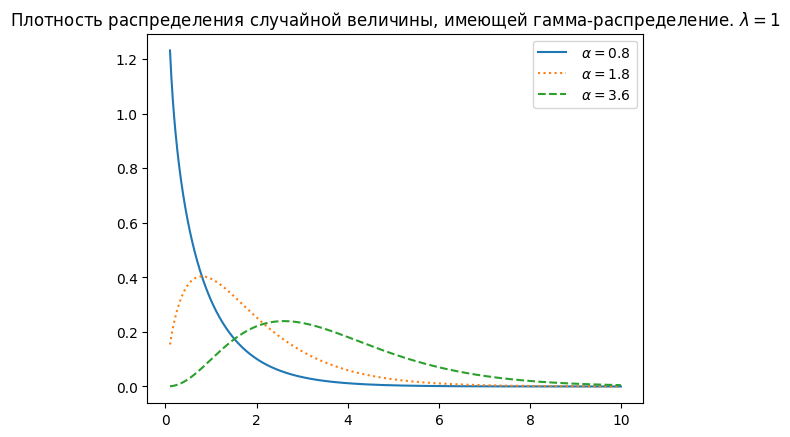

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
lam = 1.0
x = np.arange (0.1, 10.0, 0.01)
y2 = stats.gamma.pdf(x, 0.8)
y3 = stats.gamma.pdf(x, 1.8)
y4 = stats.gamma.pdf(x, 3.6)
plt.plot(x,y2, label = r" $\alpha = 0.8$")
plt.plot(x,y3, linestyle = ':', label = r" $\alpha = 1.8$")
plt.plot(x,y4, linestyle = '--', label = r" $\alpha = 3.6$")
plt.legend()
plt.title('Плотность распределения случайной величины, имеющей гамма-распределение. $\lambda = 1$')
plt.show()

# Распределение Вейбулла

В приложениях теории надежности еще одним распространенным  распределением является распределение Вейбулла, которое иногда называют *распределением экстремального значения*.

Распределение Вейбулла так же, как гамма-распределение можно рассматривать как обобщенное экспоненциальное распределение.

Распределение Вейбулла является параметрическим и зависит от трех параметров: $a > 0$ --- параметр масштаба,    $b > 0$ --- параметр формы, и $c > 0$.


Плотность распределения Вейбулла задается формулой:

$$
f(t) =  
	\frac{c}{b} \left(\frac{t - a}{b}\right)^{c-1} \exp\left[-(\frac{t - a}{b})^c\right].
$$

Из вида функции плотности распределения можно сделать вывод, что величина $x = {t - a}^c $ распределена по экспоненциальному закону с параметром $b^c$.

В частности, при $a = 0$ и $c = 1$  распределение Вейбулла вырождается в экспоненциальное (показательное) распределение с параметром $\lambda = 1/b$.


Математическое ожидание случайной величины, имеющей распределение Вейбулла с параметрами $a, b$ и $c$ определяются формулой:
$$
\mathbb{M}(\xi) = a + b\Gamma\left( 1+ \frac{1}{c}\right),
$$
где $\Gamma\left( 1+ \frac{1}{c}\right)$ --- значение гамма-функции в соответствующей точке.

График плотности распределения Вейбулла представляет собой $L$-образную кривую для $0 < c \leq 1$ и колоколообразную кривую для $c > 1$.

Иногда распределение Вейбулла рассматривают в форме, когда анализируется величина $x = \frac{t - a}{b}$. В этом случае плотность распределения случайной величины $\xi_1 = \frac{t - a}{b}$ приобретает более простую  форму:  

$$
f(x) =
\begin{cases}  
	{c} x^{c-1} \exp\left(-x^c\right), & x \geq 0, \ c > 0,\\
	0, & x < 0.
\end{cases}
$$

Математическое ожидание и дисперсия случайной величины $\xi_1$, имеющей распределение Вейбулла с параметром $c$, определяются формулами:

$$
\mathbb{M}\xi_1 = \Gamma\left( 1+ \frac{1}{c}\right) , \  \ \mathbb{D}\xi = \Gamma\left(1 + \frac{2}{c}\right) - \Gamma\left(1 + \frac{1}{c}\right)^2.
$$

Интенсивность отказов для элемента, время жизни которого имеет распределение Вейбулла,  задается соотношением:

$$
\lambda(x) = \frac{f(x)}{1 - F(x)} = c x^{c-1}.
$$

На интервале  $ 0 < c < 1$ распределение Вейбулла моделирует "отрицательное" старение, т.е. модель "новое хуже старого", а при $ c > 1$  распределение Вейбулла  моделирует "положительное" старение элемента, т.е. модель "новое лучше старого".


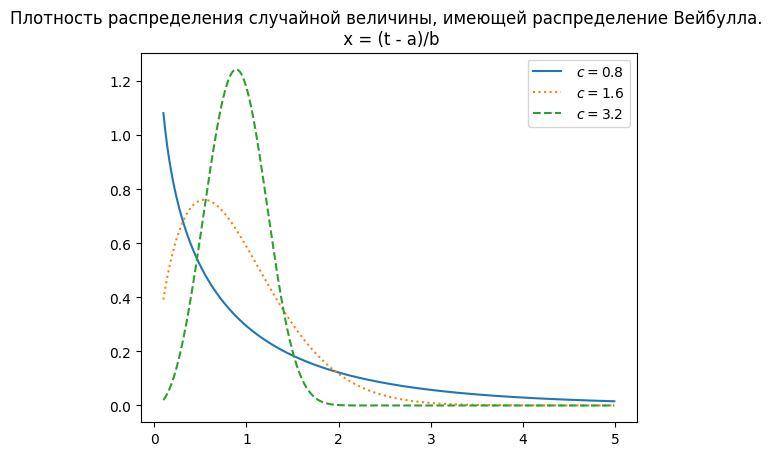

In [23]:
# x = (t - a)/ b
x = np.arange (0.1, 5.0, 0.01)
y2 = stats.weibull_min.pdf(x, 0.8)
y3 = stats.weibull_min.pdf(x, 1.6)
y4 = stats.weibull_min.pdf(x, 3.2)
plt.plot(x,y2, label = r" $с = 0.8$")
plt.plot(x,y3, linestyle = ':', label = r" $с = 1.6$")
plt.plot(x,y4, linestyle = '--', label = r" $с = 3.2$")
plt.legend()
plt.title('Плотность распределения случайной величины, имеющей распределение Вейбулла. \n x = (t - a)/b')
plt.show()

# Бета-распределение


Бета-распределение играет ключевую роль в байесовских процедурах оценивания параметров. Если случайные величины $\xi_1, \xi_2,\dots,\xi_n$ независимы и равномерно распределены на отрезке $[0,1]$, то плотность распределения $k$-й порядковой статистики задается бета-распределением с параметрами: $\alpha = k$ и $\beta = n - k + 1.$

Моменты бета-распределения задаются формулой:
$$
\mathbb{M}(\xi^n) = \frac{\Gamma(\alpha + k)\Gamma(\alpha + \beta)}{\Gamma(\alpha)\Gamma(\alpha + \beta)}.
$$

Дисперсия бета-распределения задается формулой:

$$
\mathbb{D}(\xi) = \frac{\alpha\beta}{(\alpha + \beta)^2(\alpha + \beta + 1)}.
$$


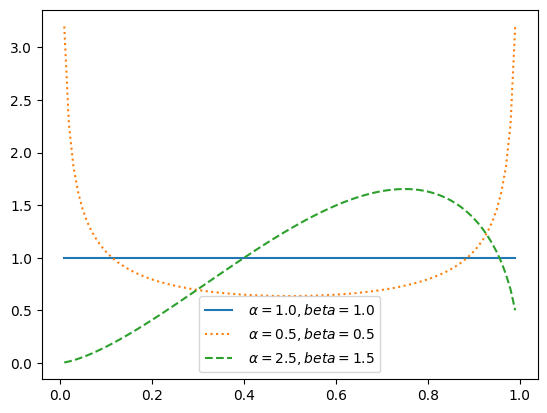

In [25]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
alpha = 1.0
beta = 1.0
x = np.arange (0.01, 1.0, 0.01)
y2 = stats.beta.pdf(x, alpha, beta)
y3 = stats.beta.pdf(x, 0.5*alpha, 0.5*beta)
y4 = stats.beta.pdf(x, 2.5*alpha, 1.5*beta)
plt.plot(x,y2, label = r" $\alpha = 1.0, beta = 1.0$")
plt.plot(x,y3, linestyle = ':', label = r" $\alpha = 0.5, beta = 0.5$")
plt.plot(x,y4, linestyle = '--', label = r" $\alpha = 2.5, beta = 1.5$")
plt.legend()
#plt.show()


При $\alpha > 1 $ и $\beta > 1 $ бета-распределение унимодально с модой в точке $x = \frac{\alpha - 1}{\alpha + \beta - 2}.$

В случае   $\alpha = 1, \beta = 1$ бета-распределение вырождается в равномерное распределение, заданное на отрезке $[0,1].$

В случае   $\alpha = 1/2, \beta = 1/2$ бета-распределение задает распределение арксинуса.


# Распределение Пуассона

Дискретное распределение Пуассона широко используется в теории надежности для моделирования числа событий, которые происходят (произойдут) на некотором временном отрезке.

распределение Пуассона --- однопараметрическое, параметр обычно называют $\lambda$.

Вероятность события, состоящего в том, что случайная величина $\xi$ примет значение $k$ есть:
$$
P(\xi = k) = \frac{\lambda^k}{k!} e^{-\lambda}.
$$

Математическое ожидание и дисперсия случайной величины, имеющей распределение Пуасона с параметром $\lambda$ определяются формулами:
$$
\mathbb{M}(\xi) = \lambda, \ \ \mathbb{D}(\xi) = {\lambda}.
$$

Ниже представлены кумулятивные вероятности (дискретный аналог функции распределения) для случайных величин, имеющих распределение Пуассона с параметрами $\lambda_1 = 1$ и  $\lambda_2 = 2$.

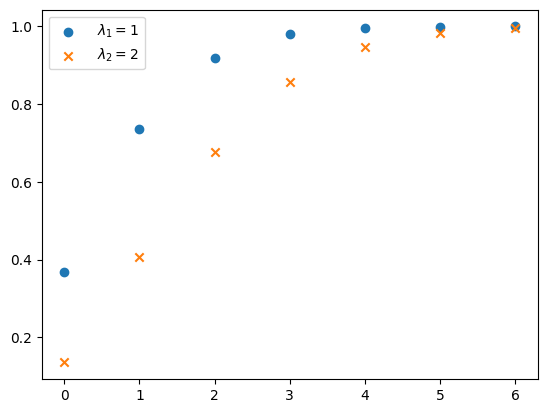

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
lam = 1.0
x = np.arange (0, 7, 1)
y1 = stats.poisson.cdf(x, lam)
y2 = stats.poisson.cdf(x, 2.0*lam)
plt.scatter(x,y1, label = r" $\lambda_1 = 1$")
plt.scatter(x,y2, marker='x', label = r" $\lambda_2 = 2$")
plt.legend()
plt.show()
